C:\Users\datalab1\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


3.0
0.0
\Users\datalab1\Lars\Panorama_Amsterdam\labelplots\Foto_596180_4.9291121678783_52.4111631089982_weights.png


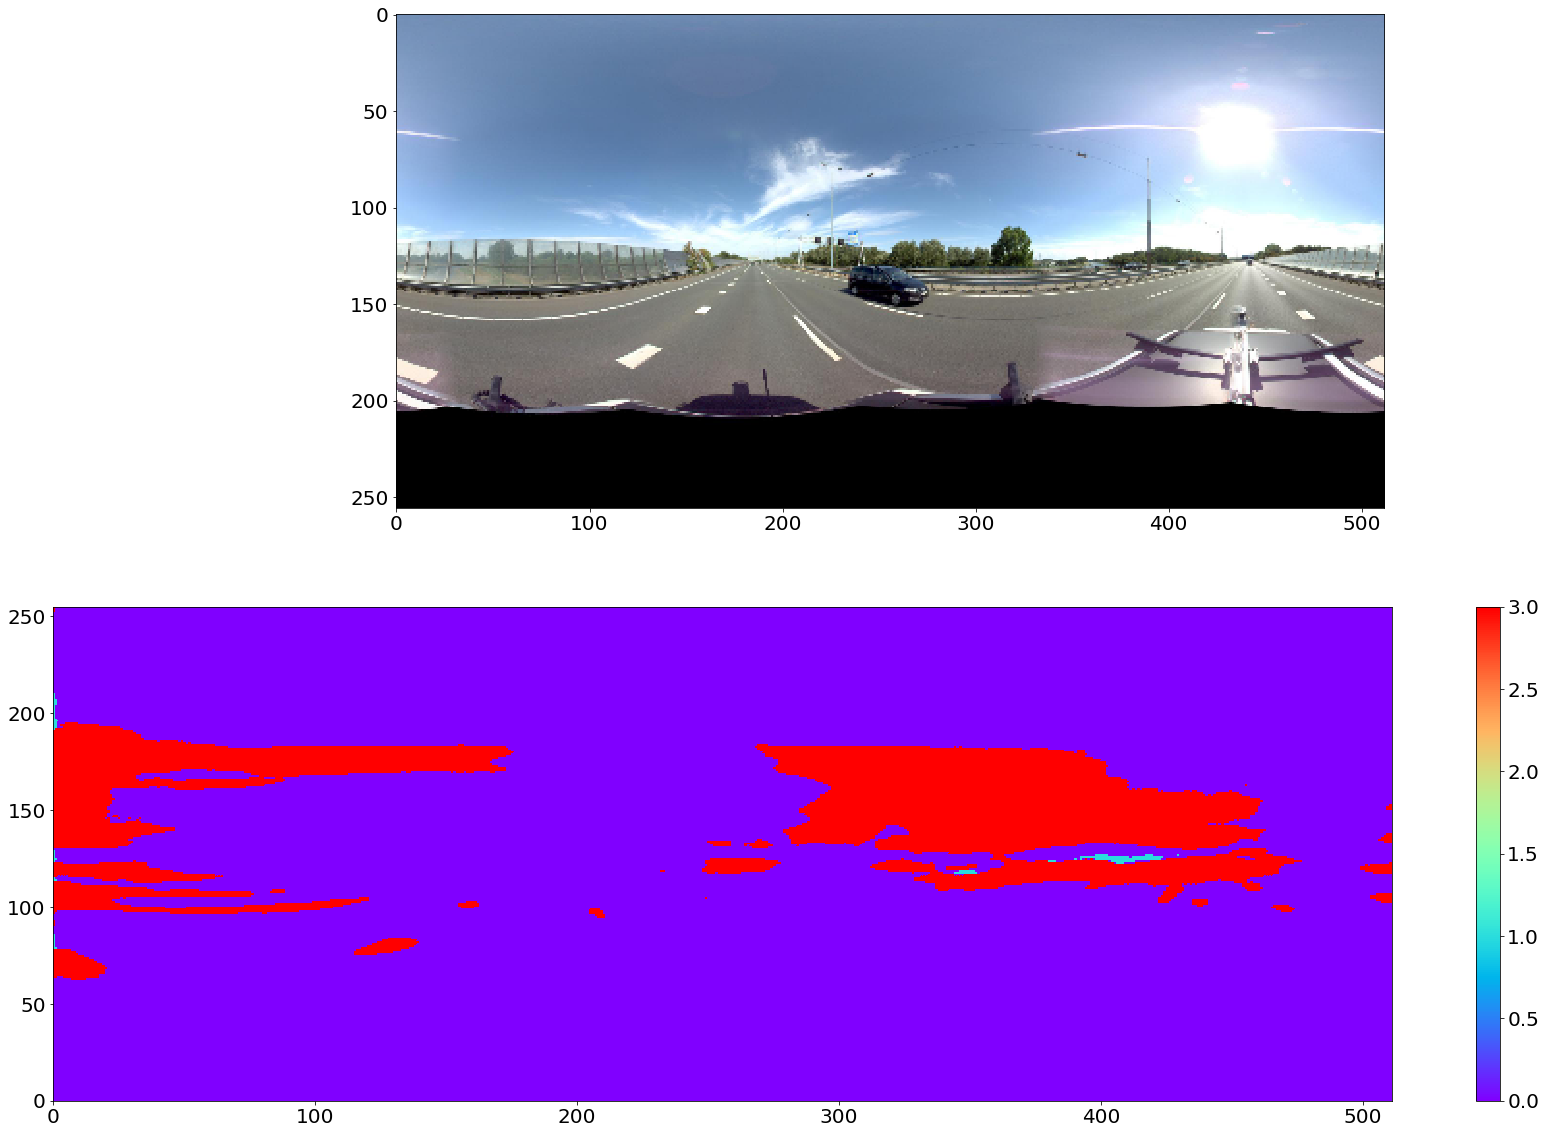

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os,sys
from pathlib import Path
from skimage.transform import resize

# Set global variables
path = Path('/Users/datalab1/Lars/Panorama_Amsterdam/')
labelPath= path / 'labeled_by_model//'
picturePath = path /'Target/'

# list labels and pictures
labelList = os.listdir(labelPath)
labelList = ['Foto_596180_4.9291121678783_52.4111631089982.txt']

pictureList = [l.replace('.txt', '.jpg') for l in labelList]

# Load labels and image
for label,picture in zip(labelList,pictureList):
    label='Foto_596180_4.9291121678783_52.4111631089982_weights.txt'
    labelArr=np.genfromtxt(str(labelPath / label),delimiter=',')
    pictureArr = plt.imread(str(picturePath / picture))
    pictureArr = resize(pictureArr,(256,512))
    
    print(np.max(labelArr))
    print(np.min(labelArr))
    
    # Plot labels and image as subplots next to each other
    # -- Set font settings

    plt.rcParams['mathtext.default'] = 'regular'
    plt.rcParams.update({'font.size': 20})

    # -- Create figure
    fig = plt.figure(figsize=[30,20])
    gs = GridSpec(2,1,width_ratios=[1],height_ratios=[1,1])
    
    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(pictureArr)
    
    ax2 = fig.add_subplot(gs[1])
    x = np.arange(512)
    y = np.arange(256)
    ax2 = plt.pcolormesh(x,np.flip(y,axis=0),labelArr, cmap='rainbow')
    fig.colorbar(ax2)
#     ax2.imshow(labelArr)
    
    savePath=path / 'labelplots' / label.replace('.txt','.png')
    print(savePath)
#     plt.savefig(savePath,bbox_inches='tight')
    
    
